<a href="https://colab.research.google.com/github/Hawawou/UE-803/blob/main/Named_Entity_Recognition_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PART 2**

In this part of the project, you will compare the output of two linguistic processing libraries (e.g., Stanza vs. Spacy). Using a given set of texts, you will run both libraries on these texts and report statistics on how often they (dis)agree with respect to the task of named entity recognition. For ease of comparison, ensure that both pipelines use the same tokenization.6 6 https://stanfordnlp.github. io/stanza/tokenize.html# start-with-pretokenized-text, https://spacy.io/api/doc#init You will use the data that you collected in Part 1. Minimally, your code should include the following functionalities and outputs.

In [4]:
import pandas as pd
import spacy

In [5]:
!pip install spacy
!pip install stanza

import stanza
stanza.download('en')
nlp_stanza = stanza.Pipeline('en', processors='tokenize,ner')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [6]:
df1 = pd.read_csv('/content/cleaned_computer_sc.csv')
df2 = pd.read_csv('/content/cleaned_sculptors.csv')


In [7]:
df = pd.concat([df1, df2])  # Concatenate the two DataFrames

texts = df['Content'].tolist()
text = ' '.join(texts)


In [8]:
import pandas as pd
import spacy

nlp_spacy = spacy.load('en_core_web_sm')
df1 = pd.read_csv('/content/cleaned_computer_sc.csv')
df2 = pd.read_csv('/content/cleaned_sculptors.csv')

# Concatenate the dataframes
df = pd.concat([df1, df2])

df.head()




,Category,Name,Content
0,Computer_Scientists,Atta ur Rehman Khan,atta ur rehman khan urdu عطا الرحمن خان comput...
1,Computer_Scientists,Wil van der Aalst,willibrordus martinus pancratius van der aalst...
2,Computer_Scientists,Scott Aaronson,scott joel aaronson born may 21 1981 american ...
3,Computer_Scientists,Rediet Abebe,rediet abebe amharic ረድኤት አበበ ethiopian comput...
4,Computer_Scientists,Hal Abelson,harold abelson born april 26 1947 american mat...


In [9]:


def name_entity_extraction(text_chunk, spacy_model, stanza_model):
    # Process the text chunk with Spacy
    spacy_doc = spacy_model(text_chunk)
    spacy_entities = [(ent.text, ent.label_) for ent in spacy_doc.ents]

    # Process the text chunk with Stanza
    stanza_doc = stanza_model(text_chunk)
    stanza_entities = [(ent.text, ent.type) for ent in stanza_doc.ents]

    return spacy_entities, stanza_entities

# Apply the function to the DataFrame
df[['spacy_entities', 'stanza_entities']] = df['Content'].apply(lambda x: pd.Series(name_entity_extraction(x, nlp_spacy, nlp_stanza)))


In [10]:
df.head()

,Category,Name,Content,spacy_entities,stanza_entities
0,Computer_Scientists,Atta ur Rehman Khan,atta ur rehman khan urdu عطا الرحمن خان comput...,"[(atta ur rehman khan, PERSON), (عطا, ORG), (خ...","[(stanford, ORG), (2, CARDINAL), (2010, DATE),..."
1,Computer_Scientists,Wil van der Aalst,willibrordus martinus pancratius van der aalst...,"[(pancratius van der aalst, PERSON), (29, CARD...","[(29 january 1966, DATE), (1988, DATE), (1992,..."
2,Computer_Scientists,Scott Aaronson,scott joel aaronson born may 21 1981 american ...,"[(scott joel aaronson, PERSON), (21 1981, DATE...","[(scott joel aaronson, PERSON), (21 1981, DATE..."
3,Computer_Scientists,Rediet Abebe,rediet abebe amharic ረድኤት አበበ ethiopian comput...,"[(rediet abebe, PERSON), (ረድኤት, GPE), (ethiopi...","[(abebe, PERSON), (ethiopian, NORP), (ethiopia..."
4,Computer_Scientists,Hal Abelson,harold abelson born april 26 1947 american mat...,"[(harold abelson, PERSON), (april 26 1947, DAT...","[(harold abelson, PERSON), (april 26 1947, DAT..."


In [11]:
import json
entities_json = df[['spacy_entities', 'stanza_entities']].to_json(orient='records')

with open('named_entities.json', 'w') as f:
    json.dump(entities_json, f, indent=4)


Report basic statistics about the predicted set
of NEs by each package (i.e. Spacy vs Stanza). This should include:

In [12]:
avg_spacy_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).mean()
min_spacy_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).min()
max_spacy_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).max()
avg_spacy_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).mean()
min_spacy_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).min()
max_spacy_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).max()

print(f'Average spacy entities for Computer Scientists: {avg_spacy_ent_CS}')
print(f'Minimum spacy entities for Computer Scientists: {min_spacy_ent_CS}')
print(f'Maximum spacy entities for Computer Scientists: {max_spacy_ent_CS}')
print(f'Average spacy entities for Sculptors: {avg_spacy_ent_Sculptor}')
print(f'Minimum spacy entities for Sculptors: {min_spacy_ent_Sculptor}')
print(f'Maximum spacy entities for Sculptors: {max_spacy_ent_Sculptor}')


Average spacy entities for Computer Scientists: 84.7127659574468
Minimum spacy entities for Computer Scientists: 3
Maximum spacy entities for Computer Scientists: 664
Average spacy entities for Sculptors: 67.66315789473684
Minimum spacy entities for Sculptors: 5
Maximum spacy entities for Sculptors: 649


In [14]:
avg_stanza_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).mean()
min_stanza_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).min()
max_stanza_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).max()
avg_stanza_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).mean()
min_stanza_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).min()
max_stanza_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).max()

print(f'Average stanza entities for Computer Scientists: {avg_stanza_ent_CS}')
print(f'Minimum stanza entities for Computer Scientists: {min_stanza_ent_CS}')
print(f'Maximum stanza entities for Computer Scientists: {max_stanza_ent_CS}')
print(f'Average stanza entities for Sculptors: {avg_stanza_ent_Sculptor}')
print(f'Minimum stanza entities for Sculptors: {min_stanza_ent_Sculptor}')
print(f'Maximum stanza entities for Sculptors: {max_stanza_ent_Sculptor}')


Average stanza entities for Computer Scientists: 84.7127659574468
Minimum stanza entities for Computer Scientists: 3
Maximum stanza entities for Computer Scientists: 664
Average stanza entities for Sculptors: 67.66315789473684
Minimum stanza entities for Sculptors: 5
Maximum stanza entities for Sculptors: 649


Average/min/max number of words in each name entity per category per package.

In [19]:
import numpy as np

cs_spacy_entities = df[df['Category'] == 'Computer_Scientists']['spacy_entities']
words_per_entity = [len(entity[0].split()) for entities in cs_spacy_entities for entity in entities]
avg_spacy_words_perNE_CS = np.mean(words_per_entity)
min_spacy_words_perNE_CS = np.min(words_per_entity)
max_spacy_words_perNE_CS = np.max(words_per_entity)
print(f'Average number of words computed with spacy per name entity for Computer Scientists: {avg_spacy_words_perNE_CS}')
print(f'Minimum number of words computed with spacy per name entity for Computer Scientists: {min_spacy_words_perNE_CS}')
print(f'Maximum number of words computed with spacy per name entity for Computer Scientists: {max_spacy_words_perNE_CS}')



Average number of words computed with spacy per name entity for Computer Scientists: 1.6549039306793922
Minimum number of words computed with spacy per name entity for Computer Scientists: 1
Maximum number of words computed with spacy per name entity for Computer Scientists: 11


In [21]:

cs_stanza_entities = df[df['Category'] == 'Computer_Scientists']['stanza_entities']
words_per_entity_st = [len(entity[0].split()) for entities in cs_stanza_entities for entity in entities]
avg_stanza_words_perNE_CS = np.mean(words_per_entity_st)
min_stanza_words_perNE_CS = np.min(words_per_entity_st)
max_stanza_words_perNE_CS = np.max(words_per_entity_st)
print(f'Average number of words computed with stanza per name entity for Computer Scientists: {avg_stanza_words_perNE_CS}')
print(f'Minimum number of words computed with stanza per name entity for Computer Scientists: {min_stanza_words_perNE_CS}')
print(f'Maximum number of words computed with stanza per name entity for Computer Scientists: {max_stanza_words_perNE_CS}')



Average number of words computed with stanza per name entity for Computer Scientists: 1.3935734752353663
Minimum number of words computed with stanza per name entity for Computer Scientists: 1
Maximum number of words computed with stanza per name entity for Computer Scientists: 33


In [23]:
sculptor_spacy_entities = df[df['Category'] == 'Sculptors']['spacy_entities']
words_per_entity_ssp = [len(entity[0].split()) for entities in sculptor_spacy_entities for entity in entities]
avg_spacy_words_perNE_Sculpt = np.mean(words_per_entity_ssp)
min_spacy_words_perNE_Sculpt = np.min(words_per_entity_ssp)
max_spacy_words_perNE_Sculpt = np.max(words_per_entity_ssp)
print(f'Average number of words computed with spacy per name entity for Sculptors: {avg_spacy_words_perNE_Sculpt}')
print(f'Minimum number of words computed with spacy per name entity for Sculptors: {min_spacy_words_perNE_Sculpt}')
print(f'Maximum number of words computed with spacy per name entity for Sculptors: {max_spacy_words_perNE_Sculpt}')



Average number of words computed with spacy per name entity for Sculptors: 1.6745488487865587
Minimum number of words computed with spacy per name entity for Sculptors: 1
Maximum number of words computed with spacy per name entity for Sculptors: 17


In [24]:
sculptor_stanza_entities = df[df['Category'] == 'Sculptors']['stanza_entities']
words_per_entity_sst = [len(entity[0].split()) for entities in sculptor_stanza_entities for entity in entities]
avg_stanza_words_perNE_Sculpt = np.mean(words_per_entity_sst)
min_stanza_words_perNE_Sculpt = np.min(words_per_entity_sst)
max_stanza_words_perNE_Sculpt = np.max(words_per_entity_sst)
print(f'Average number of words computed with stanza per name entity for Sculptors: {avg_stanza_words_perNE_Sculpt}')
print(f'Minimum number of words computed with stanza per name entity for Sculptors: {min_stanza_words_perNE_Sculpt}')
print(f'Maximum number of words computed with stanza per name entity for Sculptors: {max_stanza_words_perNE_Sculpt}')



Average number of words computed with stanza per name entity for Sculptors: 1.3999328408327736
Minimum number of words computed with stanza per name entity for Sculptors: 1
Maximum number of words computed with stanza per name entity for Sculptors: 22


Statistics vizulaization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
'''avg_spacy_ent_CS
min_spacy_ent_CS
max_spacy_ent_CS
avg_spacy_ent_Sculptor
min_spacy_ent_Sculptor
max_spacy_ent_Sculptor
avg_stanza_ent_CS
min_stanza_ent_CS
max_stanza_ent_CS
avg_stanza_ent_Sculptor
min_stanza_ent_Sculptor
max_stanza_ent_Sculptor '''

In [26]:
data = {
    'Spacy CS': [min_spacy_ent_CS, avg_spacy_ent_CS, max_spacy_ent_CS],
    'Spacy Sculptor': [min_spacy_ent_Sculptor, avg_spacy_ent_Sculptor, max_spacy_ent_Sculptor],
    'Stanza CS': [min_stanza_ent_CS, avg_stanza_ent_CS, max_stanza_ent_CS],
    'Stanza Sculptor': [min_stanza_ent_Sculptor, avg_stanza_ent_Sculptor, max_stanza_ent_Sculptor]
}

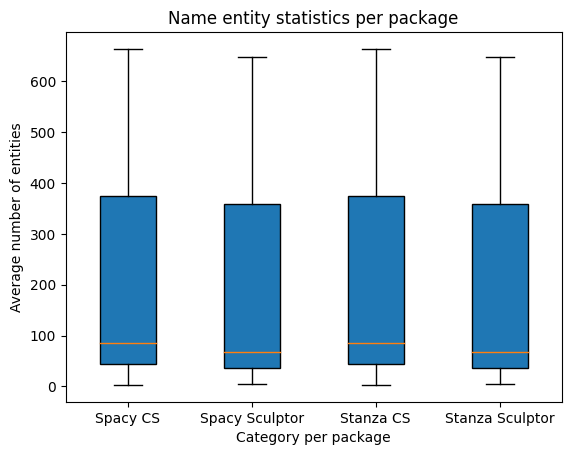

In [27]:
plt.boxplot(data.values(), vert=True, patch_artist=True, labels=data.keys())


plt.title('Name entity statistics per package')
plt.xlabel('Category per package')
plt.ylabel('Average number of entities')

# Display the plot
plt.show()

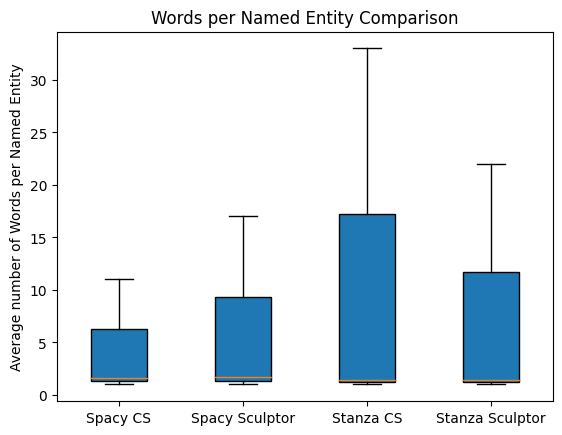

In [28]:
data = {
    'Spacy CS': [min_spacy_words_perNE_CS, avg_spacy_words_perNE_CS, max_spacy_words_perNE_CS],
    'Spacy Sculptor': [min_spacy_words_perNE_Sculpt, avg_spacy_words_perNE_Sculpt, max_spacy_words_perNE_Sculpt],
    'Stanza CS': [min_stanza_words_perNE_CS, avg_stanza_words_perNE_CS, max_stanza_words_perNE_CS],
    'Stanza Sculptor': [min_stanza_words_perNE_Sculpt, avg_stanza_words_perNE_Sculpt, max_stanza_words_perNE_Sculpt]
}


plt.boxplot(data.values(), vert=True, patch_artist=True, labels=data.keys())
plt.title('Words per Named Entity Comparison')
plt.ylabel('Average number of Words per Named Entity')

plt.show()

# 2. Analysis  by entity type

In [30]:

def ner_comparison(doc, spacy_model, stanza_model):
    # Tokenize the document using both Spacy and Stanza
    spacy_doc = spacy_model(doc)
    stanza_doc = stanza_model(doc)

    spacy_entities = [(ent.text, ent.label_) for ent in spacy_doc.ents]
    stanza_entities = [(ent.text, ent.type) for sent in stanza_doc.sentences for ent in sent.ents]

    spacy_spans = [(ent.start_char, ent.end_char) for ent in spacy_doc.ents]
    stanza_spans = [(ent.start_char, ent.end_char) for sent in stanza_doc.sentences for ent in sent.ents]
    #the number of spans where both packages agree




    # Initialize counters
    full_agreement = 0
    partial_agreement = 0
    spacy_only = 0
    stanza_only = 0
    agreement_types = 0

    # Check for overlaps and agreements
    for spacy_span in spacy_spans:
        spacy_span_text = doc[spacy_span[0]:spacy_span[1]]
        for stanza_span in stanza_spans:
            stanza_span_text = doc[stanza_span[0]:stanza_span[1]]
            if spacy_span == stanza_span:
                full_agreement += 1
                if spacy_span_text == stanza_span_text:
                    agreement_types += 1
            elif spacy_span[0] < stanza_span[1] and spacy_span[1] > stanza_span[0]:
                partial_agreement += 1

    for spacy_span in spacy_spans:
        if spacy_span not in stanza_spans:
            spacy_only += 1

    for stanza_span in stanza_spans:
        if stanza_span not in spacy_spans:
            stanza_only += 1

    return {
        'full_agreement': full_agreement,
        'partial_agreement': partial_agreement,
        'spacy_only': spacy_only,
        'stanza_only': stanza_only,
        'agreement_types': agreement_types
    }

# Load the dataset
data = pd.read_csv("/content/cleaned_computer_sc.csv")

# Initialize Spacy and Stanza models
spacy_model = spacy.load("en_core_web_sm") # Load the Spacy model after importing the library
stanza_model = stanza.Pipeline('en')

# Process each document in the dataset
statistics = []
for doc in data['content']:
    stats = ner_comparison(doc, spacy_model, stanza_model)
    statistics.append(stats)

# Visualize the statistics
# You can use your preferred visualization library like matplotlib or seaborn to plot the statistics.
# For simplicity, I'm just printing the statistics here.
for i, stats in enumerate(statistics):
    print(f"Document {i+1}:")
    print("Full Agreement:", stats['full_agreement'])
    print("Partial Agreement:", stats['partial_agreement'])
    print("Spacy Only:", stats['spacy_only'])
    print("Stanza Only:", stats['stanza_only'])
    print("Agreement in NE Type:", stats['agreement_types'])
    print()

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


KeyError: 'content'